<a href="https://colab.research.google.com/github/ranjith-getgit/Herd-Mentality/blob/main/Workbook_2_Herd_Mentality_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
---
EDA is used to analyse and investigate data sets to summarise their main characteristics. EDA is generally conducted using data visualisation techniques in contrast to the formal modelling and traditional hypothesis testing




In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import norm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Read clean file (csv.)

In [ ]:
hmdf=pd.read_csv('/content/sample_data/dataclean_ftse.csv')

In [ ]:
hmdf.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
hmdf

,Date,FTSE,3I GROUP,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AUTO TRADER GROUP,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,1740.75,783.2,1637.0,2043.0,5873,454.8,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,1703.50,770.4,1658.0,2072.0,5903,441.4,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,1667.85,738.0,1615.5,2102.0,6010,440.5,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,1749.32,785.6,1702.0,2159.0,6089,445.8,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,1763.66,809.4,1753.5,2154.0,6005,448.4,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
780,28/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
781,29/12/21,179.31,1467.5,3150.0,3028.00,1336.5,6120.0,2014.0,8656,730.4,...,176.75,291.05,3971.0,1082.0,1106.5,1200.50,112.64,1719.0,2968.00,1129.0
782,30/12/21,179.06,1458.0,3140.0,3019.50,1338.5,6008.0,2003.0,8673,735.2,...,175.20,291.25,3966.5,1100.0,1096.5,1188.50,112.38,1729.0,3012.00,1129.5


## Data Normalisation

Data normalisation is a process to convert the data to a standard format, also known as *'standardisation'*. It can be achieved by calculating daily returns for each stock price & market index using the logarithmic function

In [ ]:
returns_hmdf = pd.DataFrame() # Creation of an empty df to store the ln(logarithmic) values
returns_hmdf['Date'] = hmdf['Date'] # The 'Date' column will be consistent in the new df
for column in hmdf.columns[1:]:  # Skip the 'Date' column
    returns_hmdf[f'{column}_returns'] = np.log(hmdf[column] / hmdf[column].shift(1)) # Returns calculation using the ln function

In [ ]:
returns_hmdf

,Date,FTSE_returns,3I GROUP_returns,ADMIRAL GROUP_returns,ANGLO AMERICAN_returns,ANTOFAGASTA_returns,ASHTEAD GROUP_returns,ASSOCIATED BRIT.FOODS_returns,ASTRAZENECA_returns,AUTO TRADER GROUP_returns,...,TAYLOR WIMPEY_returns,TESCO_returns,UNILEVER (UK)_returns,UNITE GROUP_returns,UNITED UTILITIES GROUP_returns,VISTRY GROUP_returns,VODAFONE GROUP_returns,WEIR GROUP_returns,WHITBREAD_returns,WPP_returns
0,01/01/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/19,0.000213,0.013102,-0.009818,-0.021631,-0.016478,0.012747,0.014095,0.005095,-0.029906,...,0.004394,0.007610,0.008362,0.000000,0.014563,-0.002098,0.013254,-0.012403,0.004793,0.004008
2,03/01/19,-0.012140,-0.012327,-0.010414,-0.021150,-0.042966,-0.025968,0.014375,0.017964,-0.002041,...,0.006192,0.039920,-0.005203,0.000000,0.004541,-0.019246,0.007203,-0.029688,-0.003482,-0.009219
3,04/01/19,0.024484,0.038525,0.005964,0.047692,0.062504,0.052160,0.026756,0.013059,0.011960,...,0.019418,-0.009844,0.007373,0.008647,0.014027,0.018086,0.012228,0.055483,0.020506,0.012273
4,07/01/19,0.002381,-0.002489,-0.019263,0.008164,0.029845,0.029810,-0.002319,-0.013891,0.005815,...,-0.004998,0.025495,-0.011384,0.015258,-0.010834,0.006733,-0.003678,0.029954,0.021144,0.015594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
780,28/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
781,29/12/21,0.008063,0.008898,0.017615,-0.004120,0.012423,0.017805,0.011988,0.005212,0.008249,...,0.008808,0.010882,0.004670,0.008353,0.012276,0.018496,0.000888,0.005542,-0.010391,0.008004
782,30/12/21,-0.001395,-0.006495,-0.003180,-0.002811,0.001495,-0.018470,-0.005477,0.001962,0.006550,...,-0.008808,0.000687,-0.001134,0.016499,-0.009079,-0.010046,-0.002311,0.005800,0.014716,0.000443


Remove first row consisting of 'NaN' values

In [ ]:
returns_hmdf.dropna(inplace=True)
returns_hmdf

,Date,FTSE_returns,3I GROUP_returns,ADMIRAL GROUP_returns,ANGLO AMERICAN_returns,ANTOFAGASTA_returns,ASHTEAD GROUP_returns,ASSOCIATED BRIT.FOODS_returns,ASTRAZENECA_returns,AUTO TRADER GROUP_returns,...,TAYLOR WIMPEY_returns,TESCO_returns,UNILEVER (UK)_returns,UNITE GROUP_returns,UNITED UTILITIES GROUP_returns,VISTRY GROUP_returns,VODAFONE GROUP_returns,WEIR GROUP_returns,WHITBREAD_returns,WPP_returns
1,02/01/19,0.000213,0.013102,-0.009818,-0.021631,-0.016478,0.012747,0.014095,0.005095,-0.029906,...,0.004394,0.007610,0.008362,0.000000,0.014563,-0.002098,0.013254,-0.012403,0.004793,0.004008
2,03/01/19,-0.012140,-0.012327,-0.010414,-0.021150,-0.042966,-0.025968,0.014375,0.017964,-0.002041,...,0.006192,0.039920,-0.005203,0.000000,0.004541,-0.019246,0.007203,-0.029688,-0.003482,-0.009219
3,04/01/19,0.024484,0.038525,0.005964,0.047692,0.062504,0.052160,0.026756,0.013059,0.011960,...,0.019418,-0.009844,0.007373,0.008647,0.014027,0.018086,0.012228,0.055483,0.020506,0.012273
4,07/01/19,0.002381,-0.002489,-0.019263,0.008164,0.029845,0.029810,-0.002319,-0.013891,0.005815,...,-0.004998,0.025495,-0.011384,0.015258,-0.010834,0.006733,-0.003678,0.029954,0.021144,0.015594
5,08/01/19,0.014236,0.005221,0.020253,-0.008965,0.005176,0.046792,0.035123,-0.017979,0.005116,...,0.004998,0.027271,-0.001341,0.025121,0.004242,0.025343,-0.011502,0.021169,0.015980,0.009653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
780,28/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
781,29/12/21,0.008063,0.008898,0.017615,-0.004120,0.012423,0.017805,0.011988,0.005212,0.008249,...,0.008808,0.010882,0.004670,0.008353,0.012276,0.018496,0.000888,0.005542,-0.010391,0.008004
782,30/12/21,-0.001395,-0.006495,-0.003180,-0.002811,0.001495,-0.018470,-0.005477,0.001962,0.006550,...,-0.008808,0.000687,-0.001134,0.016499,-0.009079,-0.010046,-0.002311,0.005800,0.014716,0.000443


Save file (csv.)

In [ ]:
returns_hmdf.to_csv('hmdf_ftse.csv')

## Calculation of **Cross Sectional Absolute Deviation (CSAD)**

Calculation of the absolute deviation/dispersion of all stocks from the market return (FTSE 100)


In [ ]:
returns_hmdf['CSAD'] = returns_hmdf.apply(lambda row: np.mean(np.abs(row[1:] - row['FTSE_returns'])), axis=1)
# Using apply function to rows (axis=1), CSAD is calculated. Formulae: CSAD_t = (1/N) * sum(|R_i,t - R_m,t|)

In [ ]:
hmdf1=returns_hmdf[['CSAD','FTSE_returns']]
hmdf1

,CSAD,FTSE_returns
1,0.011418,0.000213
2,0.014094,-0.012140
3,0.013923,0.024484
4,0.012555,0.002381
5,0.013355,0.014236
...,...,...
779,0.000000,0.000000
780,0.000000,0.000000
781,0.009025,0.008063
782,0.006122,-0.001395


Save file (csv.)

In [ ]:
hmdf1.to_csv('hmdf1_ftse.csv')

## Descriptive Analysis

### Descriptive stats for CSAD (y) and FTSE 100 (x)

In [ ]:
hmdf1.describe().T

,count,mean,std,min,25%,50%,75%,max
CSAD,783.0,0.011502,0.006199,0.000000,0.008378,0.010252,0.012746,0.062258
FTSE_returns,783.0,0.000304,0.012713,-0.113212,-0.004840,0.000464,0.006187,0.088727


**Skewness and Kurtosis**

In [ ]:
hmdf1_skewness = skew(hmdf1['CSAD'])
hmdf1_kurtosis = kurtosis(hmdf1['CSAD'])
print(f'Skewness CSAD: {hmdf1_skewness:.6f}')
print(f'Kurtosis CSAD: {hmdf1_kurtosis:.6f}')
hmdf1_skewness = skew(hmdf1['FTSE_returns'])
hmdf1_kurtosis = kurtosis(hmdf1['FTSE_returns'])
print(f'Skewness FTSE 100: {hmdf1_skewness:.6f}')
print(f'Kurtosis FTSE 100: {hmdf1_kurtosis:.6f}')

Skewness CSAD: 3.079773
Kurtosis CSAD: 16.345325
Skewness FTSE 100: -1.022160
Kurtosis FTSE 100: 13.711164


### Descriptive stats for CSAD (y) and FTSE 100 (x) - Pre & Post COVID-19

In [ ]:
covid_event_date = '2020-02-26'
hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
pre_event = hmdf1[hmdf1['Date'] < covid_event_date]
post_event = hmdf1[hmdf1['Date'] >= covid_event_date]
pre_event_stats = pre_event[['CSAD', 'FTSE_returns']].describe()
post_event_stats = post_event[['CSAD', 'FTSE_returns']].describe()
print("Pre-COVID-19 Statistics:")
print(pre_event_stats)
print("Post-COVID-19 Statistics:")
print(post_event_stats)

Pre-COVID-19 Statistics:
             CSAD  FTSE_returns
count  301.000000    301.000000
mean     0.009679      0.000315
std      0.003695      0.009132
min      0.000000     -0.046381
25%      0.007875     -0.004155
50%      0.009037      0.000501
75%      0.010876      0.005530
max      0.032144      0.027473

Post-COVID-19 Statistics:
             CSAD  FTSE_returns
count  482.000000    482.000000
mean     0.012640      0.000296
std      0.007111      0.014517
min      0.000000     -0.113212
25%      0.009190     -0.005058
50%      0.011032      0.000447
75%      0.014377      0.006655
max      0.062258      0.088727


<ipython-input-36-e22c4419003d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
<ipython-input-36-e22c4419003d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])


**Skewness and Kurtosis**

In [ ]:
# Calculate skewness and kurtosis
def calculate_skewness_kurtosis(df, columns):
    skewness = {}
    kurtosis_vals = {}
    for col in columns:
        skewness[col] = skew(df[col].dropna())
        kurtosis_vals[col] = kurtosis(df[col].dropna())
    return pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_vals})

# Columns to analyze
columns = ['CSAD', 'FTSE_returns']

# Calculate for pre-event and post-event
pre_event_skewness_kurtosis = calculate_skewness_kurtosis(pre_event, columns)
post_event_skewness_kurtosis = calculate_skewness_kurtosis(post_event, columns)

# Combine results into a single DataFrame
combined_skewness_kurtosis = pd.concat([
    pre_event_skewness_kurtosis.add_prefix('Before-COVID-19 '),
    post_event_skewness_kurtosis.add_prefix('During-COVID-19 ')
], axis=1)

# Display the combined skewness and kurtosis in a tabular format
print(combined_skewness_kurtosis)

              Pre-COVID-19 Skewness  Pre-COVID-19 Kurtosis  \
CSAD                       1.885745               9.878417   
FTSE_returns              -0.754412               3.432174   

              Post-COVID-19 Skewness  Post-COVID-19 Kurtosis  
CSAD                        2.807588               12.729948  
FTSE_returns               -0.998547               12.362213  


### Density Plots: to evaluate normal distribution

It is evident from the graphs below that CSAD and FTSE 100 data is not normallly distributed, consists of long tails (skewness) and peakness (kurtosis) in the sample.

A right-tailed CSAD indicate that dispersion amongst stocks in the sample increases over time.

Text(0, 0.5, 'Density')

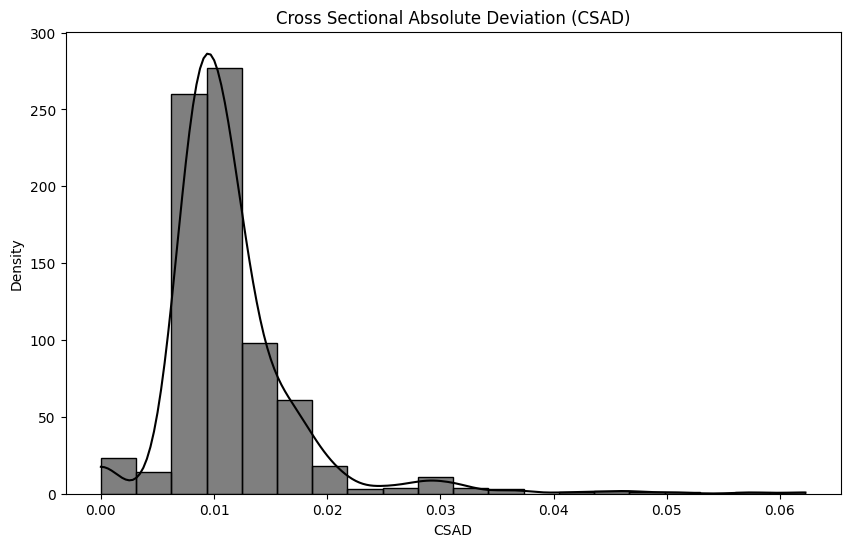

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(hmdf1['CSAD'], kde=True, color='black', bins=20)
plt.title('Cross Sectional Absolute Deviation (CSAD)')
plt.xlabel('CSAD')
plt.ylabel('Density')

A left-tailed FTSE 100 indicate that the returns within FTSE 100 depreciates over time. The dispersion of stocks (CSAD) is consistent as investors deny to conform to the market (FTSE 100).

But, this cannot be considered conclusive as CSAD is in absolute value terms and a detailed regression analysis must be conducted with absolute values of FTSE to identify the herding behaviour.

Text(0, 0.5, 'Density')

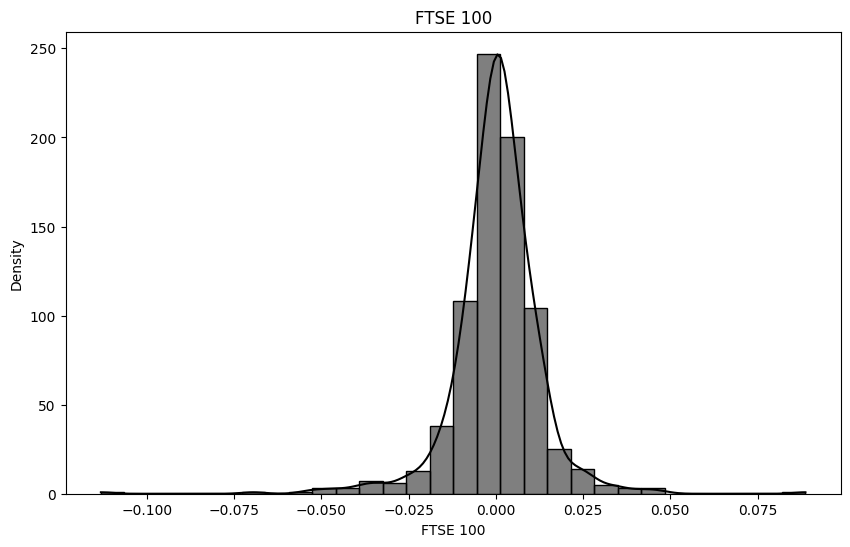

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(hmdf1['FTSE_returns'], kde=True, color='black', bins=30)
plt.title('FTSE 100')
plt.xlabel('FTSE 100')
plt.ylabel('Density')

### QQ Plots: to evaluate normal distribution

A QQ plot is a probability plot used to determine how close a sample is from the normal distribution. A QQ plot orders the z-scores from low to high, and plot each values z-score on the y-axis, the x-axis is the corresponding quantile of the normal distribution.

If the points fall on the diagonal line, then the sample distribution can be considered close to normal.

It is observed that the distribution is not normal for CSAD with the presence of outliers (long-tails) in the lower and higher quantile regions.

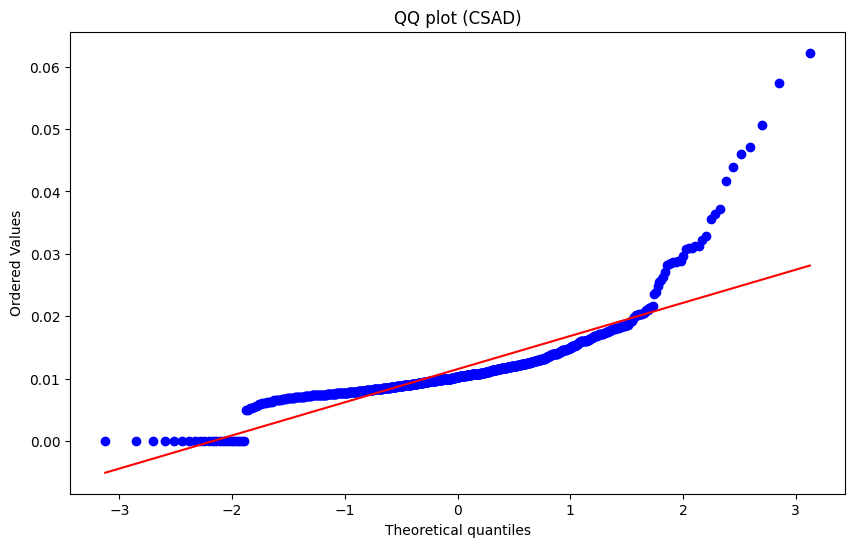

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(hmdf1['CSAD'], dist="norm", plot=plt)
plt.title('QQ plot (CSAD)')
plt.show()

It is observed that the distribution is not normal for FTSE 100 with the presence of outliers (long-tails) in the lower and higher quantile regions.

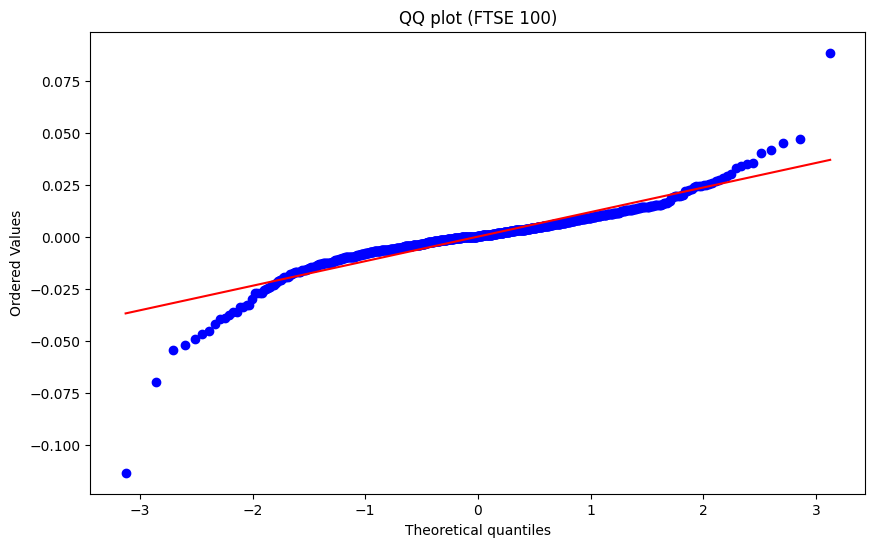

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(hmdf1['FTSE_returns'], dist="norm", plot=plt)
plt.title('QQ plot (FTSE 100)')
plt.show()

### Stationarity Plots

Graphically represent stationarity for CSAD and FTSE 100.

<ipython-input-58-71ea969ef2c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])


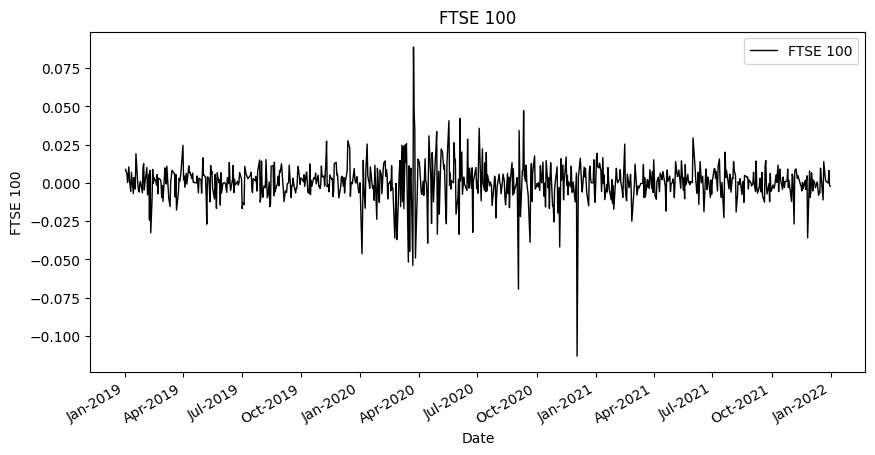

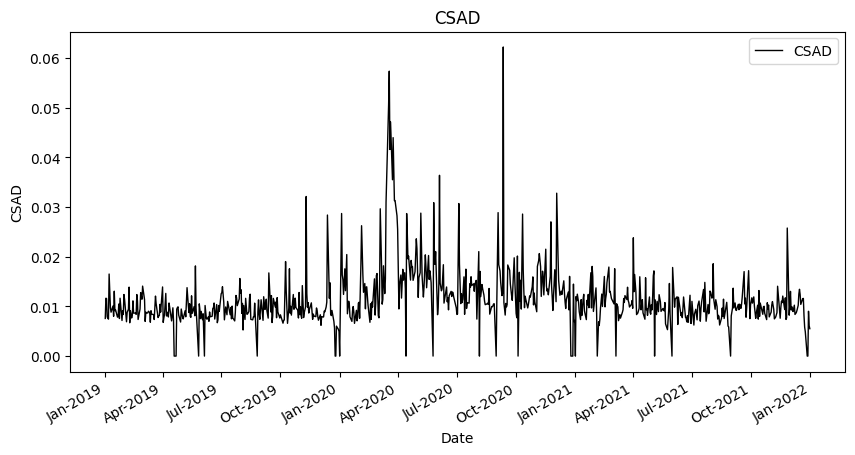

In [ ]:
hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
# Line graph for FTSE100
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='FTSE_returns', data=hmdf1, color='black', linewidth=1)
plt.title('FTSE 100')
plt.ylabel('FTSE 100')
plt.xlabel('Date')

# Formatting x-axis to Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Interval for 3 months
plt.gcf().autofmt_xdate()

plt.legend(['FTSE 100'])
plt.show()

# Line graph for CSAD
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CSAD', data=hmdf1, color='black', linewidth=1)
plt.title('CSAD')
plt.ylabel('CSAD')
plt.xlabel('Date')

# Formatting x-axis to Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Interval for 3 months
plt.gcf().autofmt_xdate()

plt.legend(['CSAD'])
plt.show()

### Pearson's Correlation

The following correlation coefficient gives an estimate of the correlation between 2 variables that lies on the same scale.

CSAD and FTSE 100 have no correlation to each other as the relationship is considered to be non-linear in nature. Correlation coefficient is not a useful metric to capture the relation for non-linear behaviour.

In [ ]:
hmdf1.corr().style.background_gradient(cmap='icefire')

,CSAD,FTSE_returns
CSAD,1.000000,0.003204
FTSE_returns,0.003204,1.000000


### Spearman's Correlation

Pearson's correlation is considered to have a major limitation. It measures the association between 2 continuous variables (linear relationship) and penalises a non-linear yet monotonic association.

A Spearman's correlation is a better alternative as it assess the monotonocity, which can be linear as well as non-lienar.

As observed below, CSAD and FTSE 100 returns have a negative relation with a Spearman correlation method. The non-linearity in the observations are captured accurately unlike the Pearson's correlation. A negative relation indicates presence of herding in the sample observations for the period.

In [ ]:
hmdf1.corr(method='spearman').style.background_gradient(cmap='icefire')

,CSAD,FTSE_returns
CSAD,1.000000,-0.015558
FTSE_returns,-0.015558,1.000000


**Scatter plot to visualise correlation**

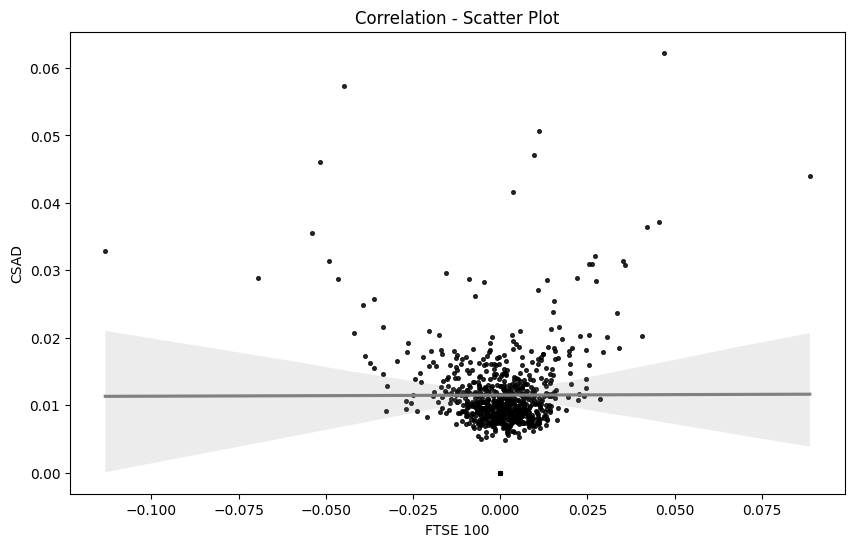

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='FTSE_returns', y='CSAD', data=hmdf1, color='black', scatter_kws={'s': 7}, line_kws={'color': 'grey'})
plt.title("Correlation - Scatter Plot")
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.show()

**Contour plot to visualise correlation**

The contour plot provides a better portrayal of the formation of a big cluster in the lower region indicating low dispersions and more than few high deviating obervations.

This could suggest a detection of herd behaviour during the sample time period. A formal inferential (regression) analysis must be conducted to get to a conclusive evidence.

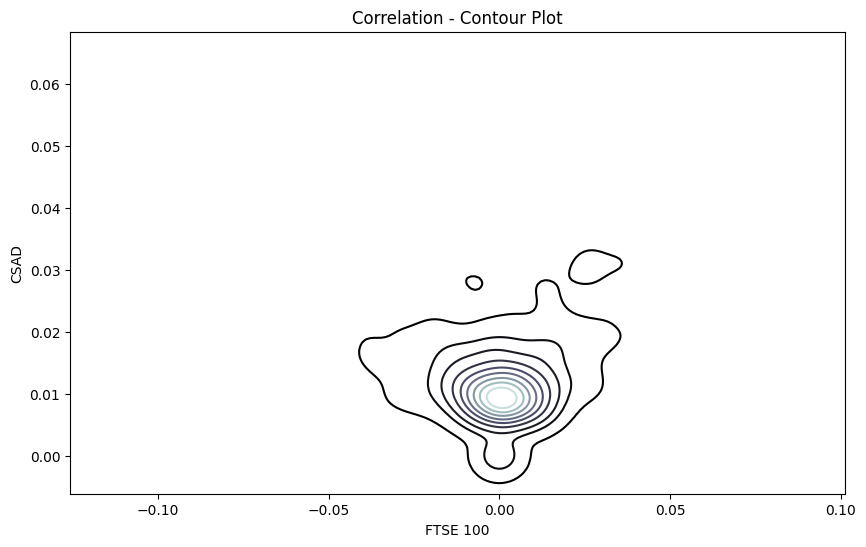

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='FTSE_returns', y='CSAD', data=hmdf1, cmap="bone", fill=False)
plt.title("Correlation - Contour Plot")
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.show()

#Sampling Distribution
---
A sample distribution of a statistic is the distribution of some sample over many samples drawn from the same population. The purpose is to make inferences from small sample to a large population.

## Gosset's T-Distribution & T-Statistics (two-tailed)

Student's T-Distribution is a continuous probability distribution that generates the standard normal distribution.

The t-distribution assess the statistical significance of the difference between two sample means. A difference in mean indicate that the original samples are independent to each other.

The following t-test is conducted to assess the difference between the means between CSAD and FTSE 100.

**Test Hypothesis:**

*   Ho: No observed difference in means of the variables
*   Ha: Observed difference in means of the variables

In [ ]:
# Convert columns to numerical
hmdf1.loc[:,'CSAD'] = pd.to_numeric(hmdf1['CSAD'], errors='coerce')
hmdf1.loc[:,'FTSE_returns'] = pd.to_numeric(hmdf1['FTSE_returns'], errors='coerce')
# Columns as numerical arrays
CSAD = hmdf1['CSAD'].values
FTSE100_returns = hmdf1['FTSE_returns'].values

# t-test
t_stat, p_value = stats.ttest_rel(CSAD,FTSE100_returns)
print(f"t-stats: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between CSAD and FTSE 100 is statistically significant.")
else:
    print("The difference between CSAD and FTSE 100  is not statistically significant.")

t-stats: 22.1835
p-value: 0.0000
The difference between CSAD and FTSE 100 is statistically significant.


The difference is statistically significant indicating that the CSAD sample is independant to the FTSE 100 sample.




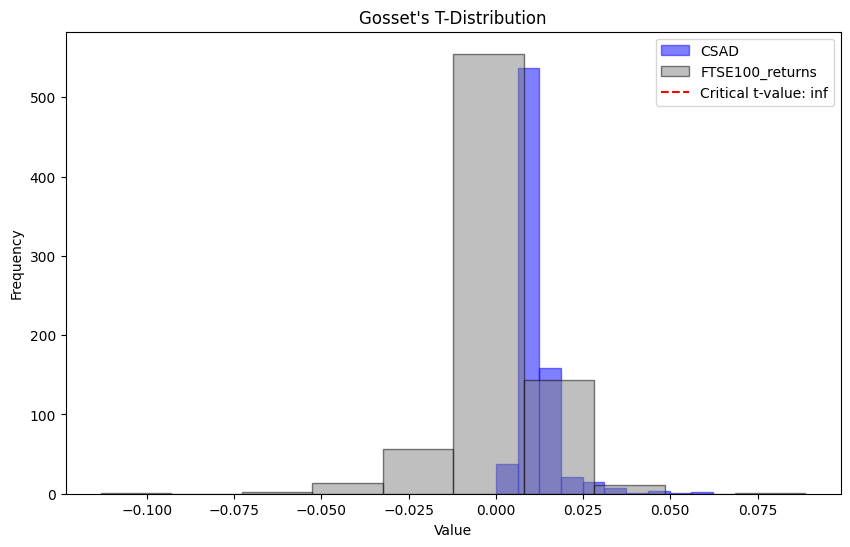

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(CSAD, bins=10, alpha=0.5, label='CSAD', color='blue', edgecolor='blue')
plt.hist(FTSE100_returns, bins=10, alpha=0.5, label='FTSE100_returns', color='grey', edgecolor='black')

# Critical t-value
critical_t_value = stats.t.ppf(1, df=len(CSAD) + len(FTSE100_returns)- 2)  # for alpha=0.05 (two-tailed)
plt.axvline(x=critical_t_value, color='red', linestyle='--', label=f'Critical t-value: {critical_t_value:.2f}')

plt.title("Gosset's T-Distribution")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

### Permutation Test with Gosset's T-Distribution (without replacement)

Through a permutation test, a random chance for sampling distribution is intended to be dismissed. By utilising the above hypothesis, a permutation test can be conducted.

Steps involved for a permutation test are,

1.   Calculate the observed differences in mean for the 2 variables
2.   Combine the results from the 2 variables in a single dataset

1.  Shuffle the combined data, then randomly draw a resample (without replacement)
2.  Calculate difference in means for the permutation sample, this constitutes the a permutation iteration

1.   Repeat the *'R'* times to yield permutation distribution
2.   Calculate the p-value based on permutation sample

In [ ]:
# Observed difference in means
obs_diff_means = np.mean(CSAD) - np.mean(FTSE100_returns)

# Number of permutation samples
num_permutations = 1000

# Combine both datasets
combined_data = np.concatenate((CSAD, FTSE100_returns))

# Initialize array to store permutation sample statistics
perm_diff_means = np.zeros(num_permutations)

# Permutation testing
for i in range(num_permutations):
    # Permute the combined data
    np.random.shuffle(combined_data)

    # Split the permuted data into two samples
    perm_sample_1 = combined_data[:len(CSAD)]
    perm_sample_2 = combined_data[len(CSAD):]

    # Difference in means for permutation samples
    perm_diff_means[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

# p-value based on permutation samples
p_value = np.mean(np.abs(perm_diff_means) >= np.abs(obs_diff_means))
print(f"p-value: {p_value:.6f}")

print(f"Observed difference in means: {obs_diff_means:.6f}")

# Compare with significance level (alpha = 0.05)
if p_value < 0.05:
    print("Observed difference is statistically significant.")
else:
    print("Observed difference is not statistically significant.")

p-value: 0.000000
Observed difference in means: 0.011198
Observed difference is statistically significant.


It is observed that the observed difference is statistically significant and do not lie within the set of the permuted differences, thus proving the sampling results are not by a random chance.

Generally, the observed difference lies far away from the permuted combinations.

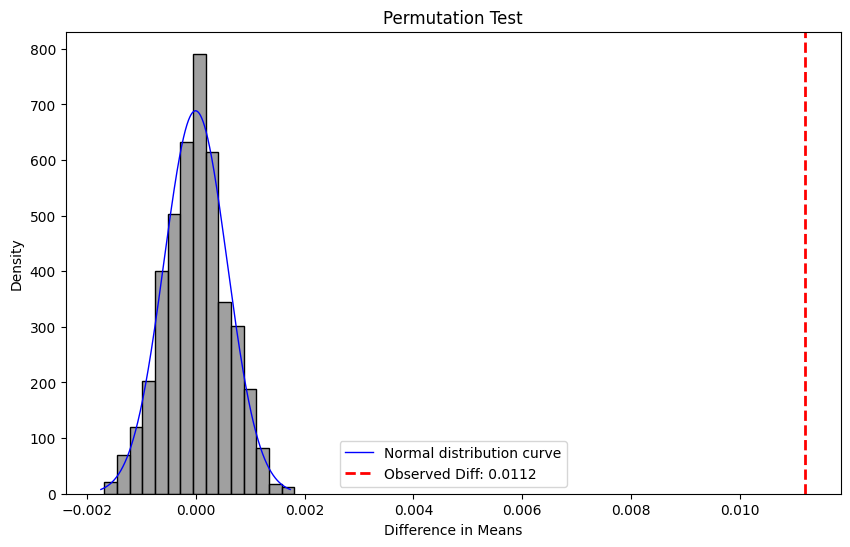

In [ ]:
# Mean and standard deviation of permutation differences
mean_perm_diff = np.mean(perm_diff_means)
std_perm_diff = np.std(perm_diff_means)

# Generate x values for normal distribution curve
x_values = np.linspace(mean_perm_diff - 3*std_perm_diff, mean_perm_diff + 3*std_perm_diff, 1000)
y_values = norm.pdf(x_values, mean_perm_diff, std_perm_diff)

# Plotting the permutation test results
plt.figure(figsize=(10, 6))
sns.histplot(perm_diff_means, bins=15, kde=False, color='grey', edgecolor='black', stat='density')
plt.plot(x_values, y_values, color='blue', linewidth=1, label='Normal distribution curve')
plt.axvline(obs_diff_means, color='red', linestyle='dashed', linewidth=2, label=f'Observed Diff: {obs_diff_means:.4f}')
plt.title('Permutation Test')
plt.xlabel('Difference in Means')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

### Bootstrap Permutation Test with Gosset's T-Distribution (with replacement)

A bootstrap permutation test, is an effective sampling technique where additional samples are obtained with replacement from the sample itself and recalculate the statistic for each sample.

A bootstrap can replicate the original sample thousands or millions of times so that a hypothetical population is generated that embodies all the knowledge from the original sample.

By utilising the above hypothesis, a bootstrap permutation test can be conducted.

Steps involved for bootstrap permutation test are,


1.   Calculate the observed difference in means of the 2 variables
2.   Draw a sample value, record, replace it

1.   Repeat *'n'* times
2.   Record the mean of the *'n'* resampled values

1.   Repeat 1-3 *'R'* times (iterations of the bootstrap)
2.   Use R results to calculate

*   standard deviation
*   find confidence interval


In [ ]:
# Observed difference in means
obs_diff_means = np.mean(CSAD) - np.mean(FTSE100_returns)

# Number of bootstrap samples
num_bootstraps = 1000

# Initialize array to store bootstrap sample statistics
bootstrap_diff_means = np.zeros(num_bootstraps)

# Bootstrapping
for i in range(num_bootstraps):
    # Generate bootstrap samples with replacement
    bootstrap_CSAD = np.random.choice(CSAD, size=len(CSAD), replace=True)
    bootstrap_FTSE100 = np.random.choice(FTSE100_returns, size=len(FTSE100_returns), replace=True)

    # Difference in means for bootstrap samples
    bootstrap_diff_means[i] = np.mean(bootstrap_CSAD) - np.mean(bootstrap_FTSE100)

# p-value based on bootstrap samples
p_value = np.mean(np.abs(bootstrap_diff_means) >= np.abs(obs_diff_means))
print(f"p-value: {p_value:.6f}")

print(f"Observed difference in means: {obs_diff_means:.6f}")

# Compare with significance level (alpha = 0.05)
if p_value < 0.05:
    print("Observed difference is statistically significant.")
else:
    print("Observed difference is not statistically significant.")

p-value: 0.547000
Observed difference in means: 0.011198
Observed difference is not statistically significant.


It is observed that the observed difference is statistically insignificant and do lie within the set of the iterated bootstrap differences. The results are not satisfactory to prove that it occurred by random chance.

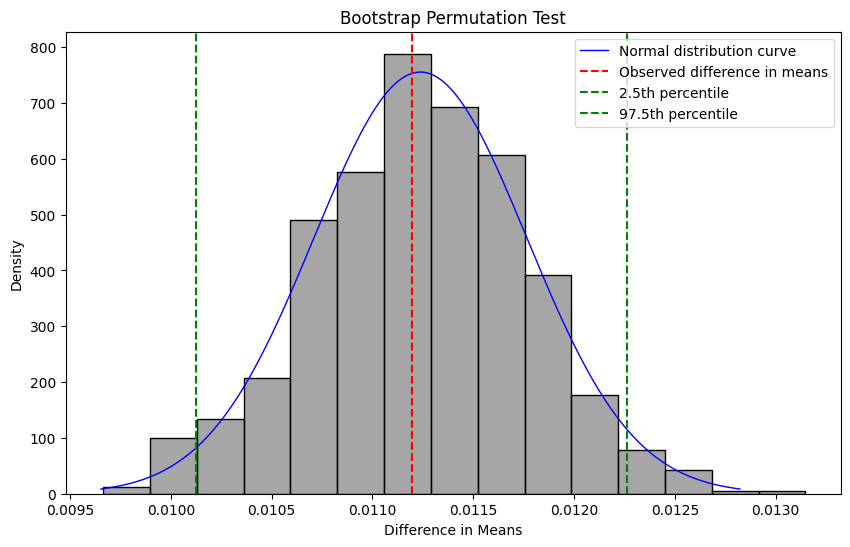

In [ ]:
confidence_interval = np.percentile(bootstrap_diff_means, [2.5, 97.5])

# Mean and standard deviation of bootstrap differences
mean_bootstrap_diff = np.mean(bootstrap_diff_means)
std_bootstrap_diff = np.std(bootstrap_diff_means)

# Generate x values for normal distribution curve
x_values = np.linspace(mean_bootstrap_diff - 3*std_bootstrap_diff, mean_bootstrap_diff + 3*std_bootstrap_diff, 1000)
y_values = norm.pdf(x_values, mean_bootstrap_diff, std_bootstrap_diff)

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diff_means, bins=15, kde=False, color='grey', alpha=0.7, stat='density')
plt.plot(x_values, y_values, color='blue', linewidth=1, label='Normal distribution curve')
plt.axvline(x=obs_diff_means, color='red', linestyle='--', label=f'Observed difference in means')
plt.axvline(x=confidence_interval[0], color='green', linestyle='--', label='2.5th percentile')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='97.5th percentile')
plt.title("Bootstrap Permutation Test")
plt.xlabel('Difference in Means')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()